<h1>DAFTAR HARGA PANGAN DI BEBERAPA DAERAH DI INDONESIA</h1>

<h3>DAFTAR NAMA KELOMPOK 3 DENGAN KONTRIBUSINYA</h3>
1. 10122054 - RIFQI MUHAMMAD HAMZAH (MEMBUAT SCRAPPING DATA)
<br>
2. 10122042 - GALFIN ILHAMI (MEMBUAT DATA DUMMY)   
<br>    
3. 10122066 - NURUL FITHRIANI ZAHRA (SORTING DATA DENGAN FIELD TERTENTU)
<br> 
4. 10122044 - ZAIDAN ALTAF ALFARIDZI (MEMBUAT DIAGRAM GARIS)
<br>
5. 10122076 - ALDI PUTRA NUGRAHA (MEMBUAT PETA)    

<h3>FOTO DOKUMENTASI KELOMPOK 3<h3>
    
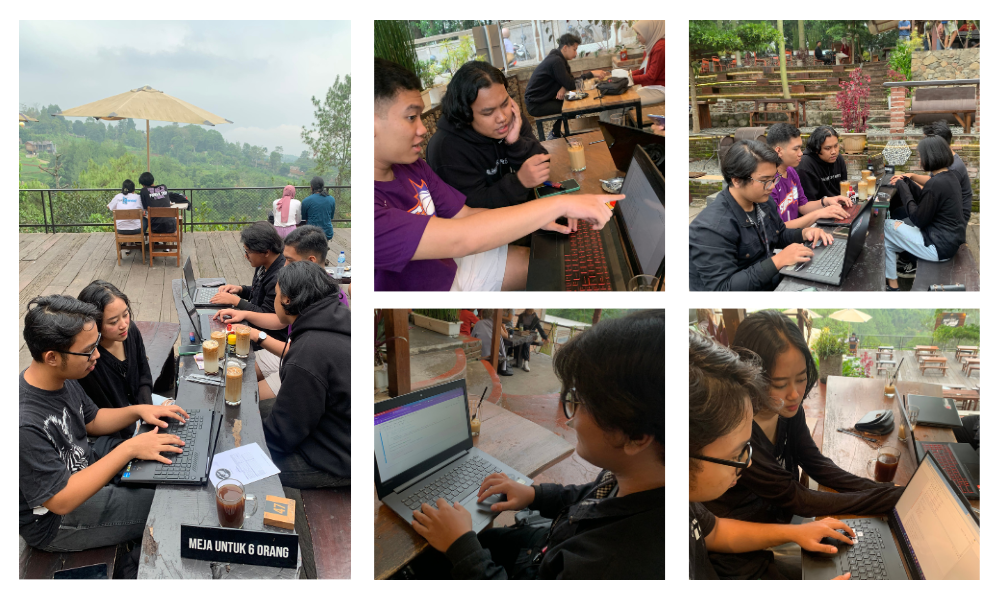

<h3>LATAR BELAKANG</h3>
<p>Latar belakang mengambil daftar harga pangan di beberapa daerah di indonesia karena struktur pasar dan distribusi pangan dapat bervariasi antara daerah, beberapa daerah mungkin memiliki kendala infrastruktur atau tranportasi yang mempengaruhi harga dan ketersediaan. Tingkat kemiskinan dan ketidaksetaraan di setiap daerah juga berdampak pada akses masyarakat terhadap pangan. Daerah dengan tingkat kemiskinan yang tinggi mungkin memerlukan perhatian khusus untuk memastikan ketersediaan pangan yang terjangkau. Melihat latar belakang ini, penting bagi pemerintah terkait untuk memahami dinamika setiap daerah dan merancang kebijakan yang sesuai untuk mendukung stabilitas harga pangan.</p>

<h3>TUJUAN</h3>
<p>Tujuan mengambil daftar harga pangan dibeberapa daerah di Indonesia untuk kepentingan ekonomi, sosial dan kebijakan. Dengan mengumpulkan data harga pangan membantu dalam pemantauan tingkat inflasi dan stabilitas harga. informasi ini menjadi dasar untuk mengevaluasi kebijakan ekonomi dan moneter serta untuk mengambil langkah-langkah korektif jika diperlukan. Data harga pangan juga dapat digunakan untuk merancang kebijakan pangan yang efektif untuk menjaga ketahanan pangan, kebijakan pemerintah terkait seperti subsidi atau regulasi harga, dapat dievaluasi berdasarkan data harga pangan.</p>

In [8]:
# Scrapping data And Save Scrapping Data To CSV

import requests
from bs4 import BeautifulSoup
import csv

def scrape_page(url):
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    table = soup.find('table', {'class': 'table'})
    rows = table.find('tbody').find_all('tr')
    
    data_list = []
    
    for row in rows:
        columns = row.find_all('td')
        data = {
            'No': columns[0].text.strip(),
            'Tanggal': columns[1].text.strip(),
            'Komoditas': columns[2].text.strip(),
            'Harga (Rp/Kg)': columns[3].text.strip(),
        }
        data_list.append(data)
    
    return data_list

def scrape_all_pages(base_url, num_pages):
    all_data = []
    
    for page in range(1, num_pages + 1):
        url = f"{base_url}&page={page}"
        page_data = scrape_page(url)
        all_data.extend(page_data)
    
    return all_data

def save_to_csv(data_list, filename='scraped_data.csv'):
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['No', 'Tanggal', 'Komoditas', 'Harga (Rp/Kg)']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        writer.writeheader()
        for data in data_list:
            writer.writerow(data)

base_url = "https://dpkp.jogjaprov.go.id/harga-pangan/list?"
num_pages = 50

result = scrape_all_pages(base_url, num_pages)

save_to_csv(result, 'scraped_data.csv')

In [1]:
# Viewing Data From CSV

import pandas as pd

filename = 'scraped_data.csv'
df = pd.read_csv(filename)

pd.set_option('display.max_rows', None)

styled_df = df.style.set_properties(**{'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

display(styled_df)


,No,Tanggal,Komoditas,Harga (Rp/Kg)
0,1,2023-12-14,Beras Medium,11933
1,2,2023-12-14,Beras Termurah,10800
2,3,2023-12-14,Gula Pasir,16500
3,4,2023-12-14,Minyak Goreng Kemasan,15000
4,5,2023-12-14,Daging Ayam,33000
5,6,2023-12-14,Telur Ayam,26000
6,7,2023-12-14,Daging Sapi,130000
7,8,2023-12-14,Bawang Merah,25000
8,9,2023-12-14,Cabe Merah Keriting,70000
9,10,2023-12-14,Cabe Merah Besar,80000


In [15]:
# Adding New Field With Dummy Data And Save New Data In CSV

import pandas as pd
import random

filename = 'scraped_data.csv'
df = pd.read_csv(filename)

daerah_list = [
    "Provinsi D I Yogyakarta",
    "Kotamadya Yogyakarta",
    "Kabupaten Sleman",
    "Kabupaten Gunung Kidul",
    "Kabupaten Kulon Progo",
    "Kabupaten Bantul"
]

df['Daerah'] = [random.choice(daerah_list) for _ in range(len(df))]

styled_df = df.style.set_properties(**{'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

df.to_csv('scraped_data_with_daerah.csv', index=False)

pd.set_option('display.max_rows', None)
display(styled_df)


,No,Tanggal,Komoditas,Harga (Rp/Kg),Daerah
0,1,2023-12-14,Beras Medium,11933,Kabupaten Gunung Kidul
1,2,2023-12-14,Beras Termurah,10800,Provinsi D I Yogyakarta
2,3,2023-12-14,Gula Pasir,16500,Kabupaten Kulon Progo
3,4,2023-12-14,Minyak Goreng Kemasan,15000,Provinsi D I Yogyakarta
4,5,2023-12-14,Daging Ayam,33000,Kabupaten Gunung Kidul
5,6,2023-12-14,Telur Ayam,26000,Kabupaten Sleman
6,7,2023-12-14,Daging Sapi,130000,Provinsi D I Yogyakarta
7,8,2023-12-14,Bawang Merah,25000,Kabupaten Sleman
8,9,2023-12-14,Cabe Merah Keriting,70000,Kabupaten Bantul
9,10,2023-12-14,Cabe Merah Besar,80000,Kabupaten Gunung Kidul


In [16]:
# Sorting Data With Ascending And Select Daging Ayam In Field Komoditas

filename = 'scraped_data_with_daerah.csv'
df = pd.read_csv(filename)

filtered_df = df[df['Komoditas'] == 'Daging Ayam'].copy()

filtered_df.sort_values(by='Tanggal', ascending=True, inplace=True)

filtered_df.reset_index(drop=True, inplace=True)

styled_df = filtered_df.style.set_properties(**{'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

pd.set_option('display.max_rows', None)
display(styled_df)

,No,Tanggal,Komoditas,Harga (Rp/Kg),Daerah
0,993,2023-04-24,Daging Ayam,45000,Kabupaten Sleman
1,974,2023-04-27,Daging Ayam,43000,Kabupaten Kulon Progo
2,955,2023-05-15,Daging Ayam,33000,Kabupaten Bantul
3,936,2023-05-19,Daging Ayam,35000,Provinsi D I Yogyakarta
4,917,2023-05-22,Daging Ayam,38000,Kabupaten Gunung Kidul
5,898,2023-05-29,Daging Ayam,31000,Kabupaten Bantul
6,879,2023-06-02,Daging Ayam,34000,Kabupaten Sleman
7,860,2023-06-05,Daging Ayam,38000,Kabupaten Gunung Kidul
8,841,2023-06-08,Daging Ayam,36000,Kabupaten Kulon Progo
9,822,2023-06-12,Daging Ayam,35000,Kabupaten Gunung Kidul


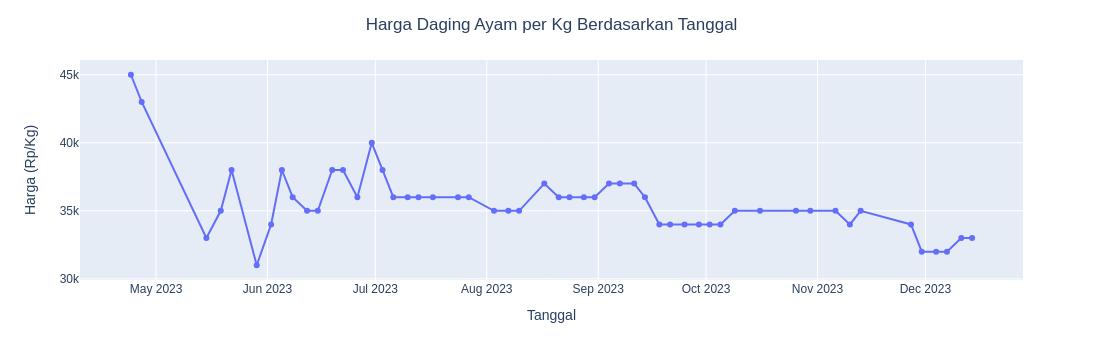

In [35]:
# Viewing data with Line Chart

import plotly.express as px
import pandas as pd

fig = px.line(filtered_df, x='Tanggal', y='Harga (Rp/Kg)', labels={'Tanggal': 'Tanggal', 'Harga (Rp/Kg)': 'Harga (Rp/Kg)'})

fig.update_traces(mode='markers+lines', hovertemplate='Harga    : %{y} /Kg<br>Tanggal : %{x}')

fig.update_layout(title='Harga Daging Ayam per Kg Berdasarkan Tanggal', title_x=0.5)

fig.show()


In [34]:
# Viewing Data In Maps

import folium
from folium.plugins import MarkerCluster

koordinat_daerah = {
    "Provinsi D I Yogyakarta": (-7.7956, 110.3695),
    "Kotamadya Yogyakarta": (-7.7956, 110.3695),
    "Kabupaten Sleman": (-7.7149, 110.3084),
    "Kabupaten Gunung Kidul": (-7.9892, 110.3176),
    "Kabupaten Kulon Progo": (-7.7925, 110.0401),
    "Kabupaten Bantul": (-7.8888, 110.3281)
}

peta = folium.Map(location=(-7.7956, 110.3695), zoom_start=10)

marker_cluster = MarkerCluster().add_to(peta)

for idx, row in filtered_df.iterrows():
    daerah = row['Daerah']
    koordinat = koordinat_daerah.get(daerah)
    
    if koordinat:
        popup_content = f"Harga: {row['Harga (Rp/Kg)']} Rp/Kg Tanggal: {row['Tanggal']}"
        folium.Marker(location=koordinat, popup=folium.Popup(popup_content, parse_html=True)).add_to(marker_cluster)

peta.save('peta_daging_ayam.html')

from IPython.display import IFrame

IFrame('peta_daging_ayam.html', width=1100, height=600)
